In [290]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

In [291]:
pd.set_option('display.max_rows', None)

### Seleccionar aquí el fichero Pass Matrix F27 de Opta 

In [292]:
## Poner aqui la ruta a nuestro archivo
file = ET.parse(r"pass_matrix_23_2018_g1009382_t178.xml") 

In [293]:
namelist= []
xlist =[]
ylist = []
pointslist = []
passer = []
receiver = []
passeslist = []
links = []
poslist = []
pass_success_list = []

for node in file.getroot():
    name = node.attrib.get("player_name")
    x = node.attrib.get("x")
    y = node.attrib.get("y")
    pos = node.attrib.get("position")
    pass_success = node.attrib.get("pass_success")
    namelist.append(name)
    xlist.append(x)
    ylist.append(y)
    poslist.append(pos)
    pass_success_list.append(pass_success)

    for players in node:
            passes = players.text
            name = players.attrib.get("player_name")
            passer.append(node.attrib.get("player_name"))
            receiver.append(name)
            passeslist.append(passes)
                   
 

In [294]:
xlist = [float(i) for i in xlist]

In [295]:
ylist = [float(i) for i in ylist]

In [296]:
for i,j in zip(xlist,ylist):
    point = [i,j]
    pointslist.append(point)
    

In [297]:
pass_success_list = [int(i) for i in pass_success_list]

In [298]:
player_dict = dict(zip(namelist, pointslist))

In [299]:
player_dict

{'Clément Lenglet': [36.9, 68.32],
 'Munir El Haddadi': [74.55, 28.67],
 'Coutinho': [64.07, 71.29],
 'Gerard Piqué': [42.12, 30.78],
 'Nélson Semedo': [53.84, 14.79],
 'Sergio Busquets': [47.44, 47.89],
 'Marc-André ter Stegen': [9.15, 50.97],
 'Luis Suárez': [68.01, 55.35],
 'Ivan Rakitic': [53.58, 71.54],
 'Ousmane Dembélé': [66.84, 25.35],
 'Arturo Vidal': [54.17, 40.0],
 'Jordi Alba': [45.07, 82.31],
 'Lionel Messi': [68.7, 45.24],
 'Sergi Roberto': [44.27, 48.84]}

 ## P_df  Jugadores y posición media basada en los contactos con el balón
 ### Players Dataframe
 
 Colummns
   * Name PlayerName
   * x Average X position
   * y Average Y position
   * PassSuccess (Total Successful Passes)
 

In [300]:
P_Df = pd.DataFrame(data = list(zip(namelist,xlist,ylist,poslist,pass_success_list)), 
                    columns = ["Name","x","y","Position","PassSuccess"])

#### Vemos los tipos de los datos

In [301]:
P_Df.dtypes

Name            object
x              float64
y              float64
Position        object
PassSuccess      int64
dtype: object

In [302]:
P_Df

Name      x      y    Position  PassSuccess
0         Clément Lenglet  36.90  68.32    Defender           67
1        Munir El Haddadi  74.55  28.67  Substitute            5
2                Coutinho  64.07  71.29     Forward           36
3            Gerard Piqué  42.12  30.78    Defender           75
4           Nélson Semedo  53.84  14.79    Defender           45
5         Sergio Busquets  47.44  47.89  Substitute           33
6   Marc-André ter Stegen   9.15  50.97  Goalkeeper           27
7             Luis Suárez  68.01  55.35     Forward           33
8            Ivan Rakitic  53.58  71.54  Midfielder           81
9         Ousmane Dembélé  66.84  25.35     Forward           21
10           Arturo Vidal  54.17  40.00  Midfielder           34
11             Jordi Alba  45.07  82.31    Defender           53
12           Lionel Messi  68.70  45.24  Substitute           19
13          Sergi Roberto  44.27  48.84  Midfielder           35

In [303]:
P_Df['PassSuccess'].sum()

564

In [304]:
P_Df.sort_values(by=['PassSuccess'],ascending=False)

Name      x      y    Position  PassSuccess
8            Ivan Rakitic  53.58  71.54  Midfielder           81
3            Gerard Piqué  42.12  30.78    Defender           75
0         Clément Lenglet  36.90  68.32    Defender           67
11             Jordi Alba  45.07  82.31    Defender           53
4           Nélson Semedo  53.84  14.79    Defender           45
2                Coutinho  64.07  71.29     Forward           36
13          Sergi Roberto  44.27  48.84  Midfielder           35
10           Arturo Vidal  54.17  40.00  Midfielder           34
5         Sergio Busquets  47.44  47.89  Substitute           33
7             Luis Suárez  68.01  55.35     Forward           33
6   Marc-André ter Stegen   9.15  50.97  Goalkeeper           27
9         Ousmane Dembélé  66.84  25.35     Forward           21
12           Lionel Messi  68.70  45.24  Substitute           19
1        Munir El Haddadi  74.55  28.67  Substitute            5

## df --> Passer Receiver Number of Passes

In [305]:
for x,y,z in zip(passer, receiver, passeslist):
    link = [x,y,z]
    links.append(link)
    
df = pd.DataFrame.from_records(data = links, columns = ["Passer","Receiver","Number of Passes"])

In [307]:
df['Number of Passes'].astype(int).sum()

563

In [306]:
true_df = pd.DataFrame()
for i in range(len(P_Df)):
    for j in range(len(P_Df)):
        if not P_Df.iloc[i,0] == P_Df.iloc[j,0]:
            true_df = true_df.append([[P_Df.iloc[i,0], P_Df.iloc[j,0]]])
true_df['2'] = None
for i in range(len(df)):
    for j in range(len(true_df)):
        if true_df.iloc[j,0] == df.iloc[i,0] and true_df.iloc[j,1] == df.iloc[i,1]:
            true_df.iloc[j,2] = df.iloc[i,2]
true_df = true_df.fillna(0)
true_df

0                      1   2
0        Clément Lenglet       Munir El Haddadi   0
0        Clément Lenglet               Coutinho   4
0        Clément Lenglet           Gerard Piqué  12
0        Clément Lenglet          Nélson Semedo   1
0        Clément Lenglet        Sergio Busquets   2
0        Clément Lenglet  Marc-André ter Stegen   9
0        Clément Lenglet            Luis Suárez   8
0        Clément Lenglet           Ivan Rakitic  17
0        Clément Lenglet        Ousmane Dembélé   0
0        Clément Lenglet           Arturo Vidal   0
0        Clément Lenglet             Jordi Alba   9
0        Clément Lenglet           Lionel Messi   0
0        Clément Lenglet          Sergi Roberto   5
0       Munir El Haddadi        Clément Lenglet   0
0       Munir El Haddadi               Coutinho   0
0       Munir El Haddadi           Gerard Piqué   0
0       Munir El Haddadi          Nélson Semedo   2
0       Munir El Haddadi        Sergio Busquets   1
0       Munir El Haddadi  Marc-André ter Stegen   0
0       Munir El Haddadi            Luis Suárez   2
0       Munir El Haddadi           Ivan Rakitic   0
0       Munir El Haddadi        Ousmane Dembélé   0
0       Munir El Haddadi           Arturo Vidal   0
0       Munir El Haddadi             Jordi Alba   0
0       Munir El Haddadi           Lionel Messi   0
0       Munir El Haddadi          Sergi Roberto   0
0               Coutinho        Clément Lenglet   2
0               Coutinho       Munir El Haddadi   0
0               Coutinho           Gerard Piqué   1
0               Coutinho          Nélson Semedo   2
0               Coutinho        Sergio Busquets   1
0               Coutinho  Marc-André ter Stegen   0
0               Coutinho            Luis Suárez   5
0               Coutinho           Ivan Rakitic  11
0               Coutinho        Ousmane Dembélé   1
0               Coutinho           Arturo Vidal   3
0               Coutinho             Jordi Alba   6
0               Coutinho           Lionel Messi   4
0               Coutinho          Sergi Roberto   0
0           Gerard Piqué        Clément Lenglet  12
0           Gerard Piqué       Munir El Haddadi   1
0           Gerard Piqué               Coutinho   4
0           Gerard Piqué          Nélson Semedo  11
0           Gerard Piqué        Sergio Busquets   1
0           Gerard Piqué  Marc-André ter Stegen   5
0           Gerard Piqué            Luis Suárez   5
0           Gerard Piqué           Ivan Rakitic   9
0           Gerard Piqué        Ousmane Dembélé  11
0           Gerard Piqué           Arturo Vidal   6
0           Gerard Piqué             Jordi Alba   1
0           Gerard Piqué           Lionel Messi   5
0           Gerard Piqué          Sergi Roberto   4
0          Nélson Semedo        Clément Lenglet   2
0          Nélson Semedo       Munir El Haddadi   2
0          Nélson Semedo               Coutinho   0
0          Nélson Semedo           Gerard Piqué   9
0          Nélson Semedo        Sergio Busquets   4
0          Nélson Semedo  Marc-André ter Stegen   1
0          Nélson Semedo            Luis Suárez   3
0          Nélson Semedo           Ivan Rakitic   1
0          Nélson Semedo        Ousmane Dembélé  12
0          Nélson Semedo           Arturo Vidal   6
0          Nélson Semedo             Jordi Alba   1
0          Nélson Semedo           Lionel Messi   1
0          Nélson Semedo          Sergi Roberto   3
0        Sergio Busquets        Clément Lenglet   7
0        Sergio Busquets       Munir El Haddadi   0
0        Sergio Busquets               Coutinho   1
0        Sergio Busquets           Gerard Piqué   5
0        Sergio Busquets          Nélson Semedo   1
0        Sergio Busquets  Marc-André ter Stegen   1
0        Sergio Busquets            Luis Suárez   3
0        Sergio Busquets           Ivan Rakitic   4
0        Sergio Busquets        Ousmane Dembélé   1
0        Sergio Busquets           Arturo Vidal   0
0        Sergio Busquets             Jordi Alba   2
0        Sergio Bus

In [308]:
true_df['2'].astype(int).sum()

563

In [318]:
true_df_sum = pd.DataFrame()
for i in range(len(true_df)):
    for j in range(len(true_df)):
        if (true_df.iloc[i,0] == true_df.iloc[j,1]) and (true_df.iloc[j,0] == true_df.iloc[i,1]) and (i<j):
            true_df_sum = true_df_sum.append([[true_df.iloc[i,0], true_df.iloc[i,1], str(int(true_df.iloc[i,2])+int(true_df.iloc[j,2]))]])
true_df_sum = true_df_sum.drop_duplicates().rename(columns={0: 'Passer 1', 1: 'Passer 2', 2: 'Number of Passes'}).reset_index(drop=True)
true_df_sum

Passer 1               Passer 2 Number of Passes
0         Clément Lenglet       Munir El Haddadi                0
1         Clément Lenglet               Coutinho                6
2         Clément Lenglet           Gerard Piqué               24
3         Clément Lenglet          Nélson Semedo                3
4         Clément Lenglet        Sergio Busquets                9
5         Clément Lenglet  Marc-André ter Stegen               13
6         Clément Lenglet            Luis Suárez                8
7         Clément Lenglet           Ivan Rakitic               27
8         Clément Lenglet        Ousmane Dembélé                0
9         Clément Lenglet           Arturo Vidal                2
10        Clément Lenglet             Jordi Alba               20
11        Clément Lenglet           Lionel Messi                0
12        Clément Lenglet          Sergi Roberto               10
13       Munir El Haddadi               Coutinho                0
14       Munir El Haddadi           Gerard Piqué                1
15       Munir El Haddadi          Nélson Semedo                4
16       Munir El Haddadi        Sergio Busquets                1
17       Munir El Haddadi  Marc-André ter Stegen                0
18       Munir El Haddadi            Luis Suárez                4
19       Munir El Haddadi           Ivan Rakitic                1
20       Munir El Haddadi        Ousmane Dembélé                0
21       Munir El Haddadi           Arturo Vidal                0
22       Munir El Haddadi             Jordi Alba                0
23       Munir El Haddadi           Lionel Messi                1
24       Munir El Haddadi          Sergi Roberto                0
25               Coutinho           Gerard Piqué                5
26               Coutinho          Nélson Semedo                2
27               Coutinho        Sergio Busquets                2
28               Coutinho  Marc-André ter Stegen                1
29               Coutinho            Luis Suárez                9
30               Coutinho           Ivan Rakitic               25
31               Coutinho        Ousmane Dembélé                2
32               Coutinho           Arturo Vidal                5
33               Coutinho             Jordi Alba               18
34               Coutinho           Lionel Messi                8
35               Coutinho          Sergi Roberto                1
36           Gerard Piqué          Nélson Semedo               20
37           Gerard Piqué        Sergio Busquets                6
38           Gerard Piqué  Marc-André ter Stegen               10
39           Gerard Piqué            Luis Suárez                7
40           Gerard Piqué           Ivan Rakitic               18
41           Gerard Piqué        Ousmane Dembélé               12
42           Gerard Piqué           Arturo Vidal               13
43           Gerard Piqué             Jordi Alba                3
44           Gerard Piqué           Lionel Messi                5
45           Gerard Piqué          Sergi Roberto               11
46          Nélson Semedo        Sergio Busquets                5
47          Nélson Semedo  Marc-André ter Stegen                2
48          Nélson Semedo            Luis Suárez                4
49          Nélson Semedo           Ivan Rakitic                4
50          Nélson Semedo        Ousmane Dembélé               21
51          Nélson Semedo           Arturo Vidal               11
52          Nélson Semedo             Jordi Alba                1
53          Nélson Semedo           Lionel Messi                3
54          Nélson Semedo          Sergi Roberto                5
55        Sergio Busquets  Marc-André ter Stegen                4
56        Sergio Busquets            Luis Suárez                4
57        Sergio Busquets           Ivan Rakitic               12
58        Sergio Busquets        Ousmane Dembélé                2
59        Sergio Busquets           Arturo Vidal         

In [319]:
true_df_sum['Number of Passes'].astype(int).sum()

563

### Ver el tipo de las columnas

In [320]:
true_df_sum.dtypes

Passer 1            object
Passer 2            object
Number of Passes    object
dtype: object

#### Convertir la columna Number of Passes de cadena de texto a número entero

In [321]:
true_df_sum['Number of Passes'] = true_df_sum['Number of Passes'].astype('int64')

In [322]:
true_df_sum.dtypes

Passer 1            object
Passer 2            object
Number of Passes     int64
dtype: object

### Filtrar combinaciones de pases con 8 o más pases

In [323]:
true_df_sum = true_df_sum[true_df_sum['Number of Passes'] >= 8]
true_df_sum

Passer 1               Passer 2  Number of Passes
2   Clément Lenglet           Gerard Piqué                24
4   Clément Lenglet        Sergio Busquets                 9
5   Clément Lenglet  Marc-André ter Stegen                13
6   Clément Lenglet            Luis Suárez                 8
7   Clément Lenglet           Ivan Rakitic                27
10  Clément Lenglet             Jordi Alba                20
12  Clément Lenglet          Sergi Roberto                10
29         Coutinho            Luis Suárez                 9
30         Coutinho           Ivan Rakitic                25
33         Coutinho             Jordi Alba                18
34         Coutinho           Lionel Messi                 8
36     Gerard Piqué          Nélson Semedo                20
38     Gerard Piqué  Marc-André ter Stegen                10
40     Gerard Piqué           Ivan Rakitic                18
41     Gerard Piqué        Ousmane Dembélé                12
42     Gerard Piqué           Arturo Vidal                13
45     Gerard Piqué          Sergi Roberto                11
50    Nélson Semedo        Ousmane Dembélé                21
51    Nélson Semedo           Arturo Vidal                11
57  Sergio Busquets           Ivan Rakitic                12
61  Sergio Busquets           Lionel Messi                11
70      Luis Suárez           Ivan Rakitic                14
74      Luis Suárez           Lionel Messi                 9
78     Ivan Rakitic             Jordi Alba                32
80     Ivan Rakitic          Sergi Roberto                11
87     Arturo Vidal          Sergi Roberto                11
89       Jordi Alba          Sergi Roberto                 9

In [324]:
true_df_sum.sort_values(by=['Number of Passes'],ascending=False)

Passer 1               Passer 2  Number of Passes
78     Ivan Rakitic             Jordi Alba                32
7   Clément Lenglet           Ivan Rakitic                27
30         Coutinho           Ivan Rakitic                25
2   Clément Lenglet           Gerard Piqué                24
50    Nélson Semedo        Ousmane Dembélé                21
10  Clément Lenglet             Jordi Alba                20
36     Gerard Piqué          Nélson Semedo                20
33         Coutinho             Jordi Alba                18
40     Gerard Piqué           Ivan Rakitic                18
70      Luis Suárez           Ivan Rakitic                14
42     Gerard Piqué           Arturo Vidal                13
5   Clément Lenglet  Marc-André ter Stegen                13
41     Gerard Piqué        Ousmane Dembélé                12
57  Sergio Busquets           Ivan Rakitic                12
51    Nélson Semedo           Arturo Vidal                11
87     Arturo Vidal          Sergi Roberto                11
45     Gerard Piqué          Sergi Roberto                11
80     Ivan Rakitic          Sergi Roberto                11
61  Sergio Busquets           Lionel Messi                11
12  Clément Lenglet          Sergi Roberto                10
38     Gerard Piqué  Marc-André ter Stegen                10
74      Luis Suárez           Lionel Messi                 9
29         Coutinho            Luis Suárez                 9
4   Clément Lenglet        Sergio Busquets                 9
89       Jordi Alba          Sergi Roberto                 9
34         Coutinho           Lionel Messi                 8
6   Clément Lenglet            Luis Suárez                 8

### P_df    --->  tabla con la posición media de los jugadores
* Name nombre del jugador
* x posición media x
* y posición media y
* position (Demarcación Portero, Defensa, Centrocampista y Suplente)
* PassSuccess = Total Passes by player

In [325]:
P_Df.head(15)

Name      x      y    Position  PassSuccess
0         Clément Lenglet  36.90  68.32    Defender           67
1        Munir El Haddadi  74.55  28.67  Substitute            5
2                Coutinho  64.07  71.29     Forward           36
3            Gerard Piqué  42.12  30.78    Defender           75
4           Nélson Semedo  53.84  14.79    Defender           45
5         Sergio Busquets  47.44  47.89  Substitute           33
6   Marc-André ter Stegen   9.15  50.97  Goalkeeper           27
7             Luis Suárez  68.01  55.35     Forward           33
8            Ivan Rakitic  53.58  71.54  Midfielder           81
9         Ousmane Dembélé  66.84  25.35     Forward           21
10           Arturo Vidal  54.17  40.00  Midfielder           34
11             Jordi Alba  45.07  82.31    Defender           53
12           Lionel Messi  68.70  45.24  Substitute           19
13          Sergi Roberto  44.27  48.84  Midfielder           35

In [326]:
true_df_sum.head(50)

Passer 1               Passer 2  Number of Passes
2   Clément Lenglet           Gerard Piqué                24
4   Clément Lenglet        Sergio Busquets                 9
5   Clément Lenglet  Marc-André ter Stegen                13
6   Clément Lenglet            Luis Suárez                 8
7   Clément Lenglet           Ivan Rakitic                27
10  Clément Lenglet             Jordi Alba                20
12  Clément Lenglet          Sergi Roberto                10
29         Coutinho            Luis Suárez                 9
30         Coutinho           Ivan Rakitic                25
33         Coutinho             Jordi Alba                18
34         Coutinho           Lionel Messi                 8
36     Gerard Piqué          Nélson Semedo                20
38     Gerard Piqué  Marc-André ter Stegen                10
40     Gerard Piqué           Ivan Rakitic                18
41     Gerard Piqué        Ousmane Dembélé                12
42     Gerard Piqué           Arturo Vidal                13
45     Gerard Piqué          Sergi Roberto                11
50    Nélson Semedo        Ousmane Dembélé                21
51    Nélson Semedo           Arturo Vidal                11
57  Sergio Busquets           Ivan Rakitic                12
61  Sergio Busquets           Lionel Messi                11
70      Luis Suárez           Ivan Rakitic                14
74      Luis Suárez           Lionel Messi                 9
78     Ivan Rakitic             Jordi Alba                32
80     Ivan Rakitic          Sergi Roberto                11
87     Arturo Vidal          Sergi Roberto                11
89       Jordi Alba          Sergi Roberto                 9

![Campo](imagenes/Opta_campo.png)

### Función que dibuja las líneas entre los puntos

In [337]:
def Plotter(passer, receiver, number):
    xcord = []
    ycord = []
    passer_loc = [val for key, val in player_dict.items() if key ==passer]
    receiver_loc = [val for key, val in player_dict.items() if key == receiver]
    for i,j in zip(passer_loc, receiver_loc):
        xcord.append(i[0])
        ycord.append(i[1])
        xcord.append(j[0])
        ycord.append(j[1])
        plt.arrow(x = xcord[0],
                  y = ycord[0],
                  dx = (xcord[1]-xcord[0]),
                  dy = (ycord[1]-ycord[0]), 
                  linewidth = int(number), 
                  alpha = (int(number)/10),
                  length_includes_head=False,
                  color = "red")     

## Gráfico Final

In [338]:
P_Df

Name      x      y    Position  PassSuccess
0         Clément Lenglet  36.90  68.32    Defender           67
1        Munir El Haddadi  74.55  28.67  Substitute            5
2                Coutinho  64.07  71.29     Forward           36
3            Gerard Piqué  42.12  30.78    Defender           75
4           Nélson Semedo  53.84  14.79    Defender           45
5         Sergio Busquets  47.44  47.89  Substitute           33
6   Marc-André ter Stegen   9.15  50.97  Goalkeeper           27
7             Luis Suárez  68.01  55.35     Forward           33
8            Ivan Rakitic  53.58  71.54  Midfielder           81
9         Ousmane Dembélé  66.84  25.35     Forward           21
10           Arturo Vidal  54.17  40.00  Midfielder           34
11             Jordi Alba  45.07  82.31    Defender           53
12           Lionel Messi  68.70  45.24  Substitute           19
13          Sergi Roberto  44.27  48.84  Midfielder           35

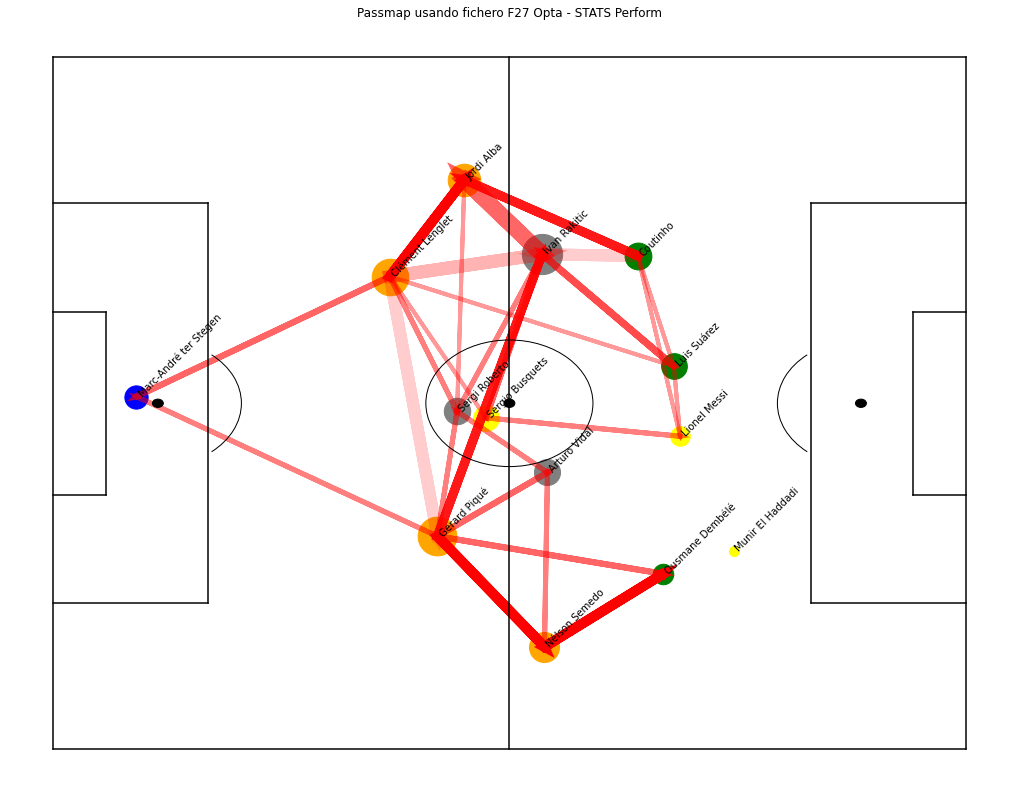

In [340]:
fig, ax = plt.subplots(figsize=(18,14))

# Flechas con los pases entre los jugadores con Plotter(passer, receiver, number)
for i in range(len(true_df_sum)):
    Plotter(true_df_sum.iloc[i,0], true_df_sum.iloc[i,1], true_df_sum.iloc[i,2]/2)

# Posición Media Scatter Puntos con color en función de su demarcación
for i in range(len(P_Df)):
    ax.text(P_Df.iloc[i,1], P_Df.iloc[i,2], s = P_Df.iloc[i,0], rotation = 45, size = 10)
    if P_Df.iloc[i,3] == "Goalkeeper":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*20, zorder = 1, color = "blue")
    if P_Df.iloc[i,3] == "Forward":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*20, zorder = 1, color = "green")            
    if P_Df.iloc[i,3] == "Midfielder":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*20, zorder = 1, color = "grey")
    if P_Df.iloc[i,3] == "Defender":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*20, zorder = 1, color = "orange")
    if P_Df.iloc[i,3] == "Substitute":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*20, zorder = 1, color = "yellow")
  


# OPTA PITCH
# Pitch Outline & Centre Line 
plt.plot([0,0],[0,100], color="black")
plt.plot([0,100],[100,100], color="black") #upper line x_start x_end y_start y_end
plt.plot([100,100],[100,0], color="black")
plt.plot([100,0],[0,0], color="black")
plt.plot([50,50],[0,100], color="black")

# Left Penalty Area
plt.plot([17,17],[78.9,21.1],color="black")
plt.plot([0,17],[78.9,78.9],color="black")
plt.plot([17,0],[21.1,21.1],color="black")

# Right Penalty Area
plt.plot([100,83],[78.9,78.9],color="black")
plt.plot([83,83],[78.9,21.1],color="black")
plt.plot([83,100],[21.1,21.1],color="black")

# Left 6-yard Box
plt.plot([0,5.8],[63.2,63.2],color="black")
plt.plot([5.8,5.8],[63.2,36.8],color="black")
plt.plot([5.8,0],[36.8,36.8],color="black")

# Right 6-yard Box 
plt.plot([100,94.2],[63.2,63.2],color="black")
plt.plot([94.2,94.2],[63.2,36.8],color="black")
plt.plot([94.2,100],[36.8,36.8],color="black")

# Prepare Circles OK
centreCircle = plt.Circle((50,50),9.15,color="black",fill=False)
centreSpot = plt.Circle((50,50),0.6,color="black")
leftPenSpot = plt.Circle((11.5,50),0.6,color="black")
rightPenSpot = plt.Circle((88.5,50),0.6,color="black")

# Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

# Prepare Arcs based on penalty Spots 
leftArc = Arc((11.5,50),height=18.3,width=18.3,angle=0,
              theta1=310,theta2=50,color="black")
rightArc = Arc((88.5,50),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")


# Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

# Quitar Ejes
plt.axis("off")
plt.title("Passmap usando fichero F27 Opta - STATS Perform")

plt.show()

## Grafico Posición media basada en contactos con el balón

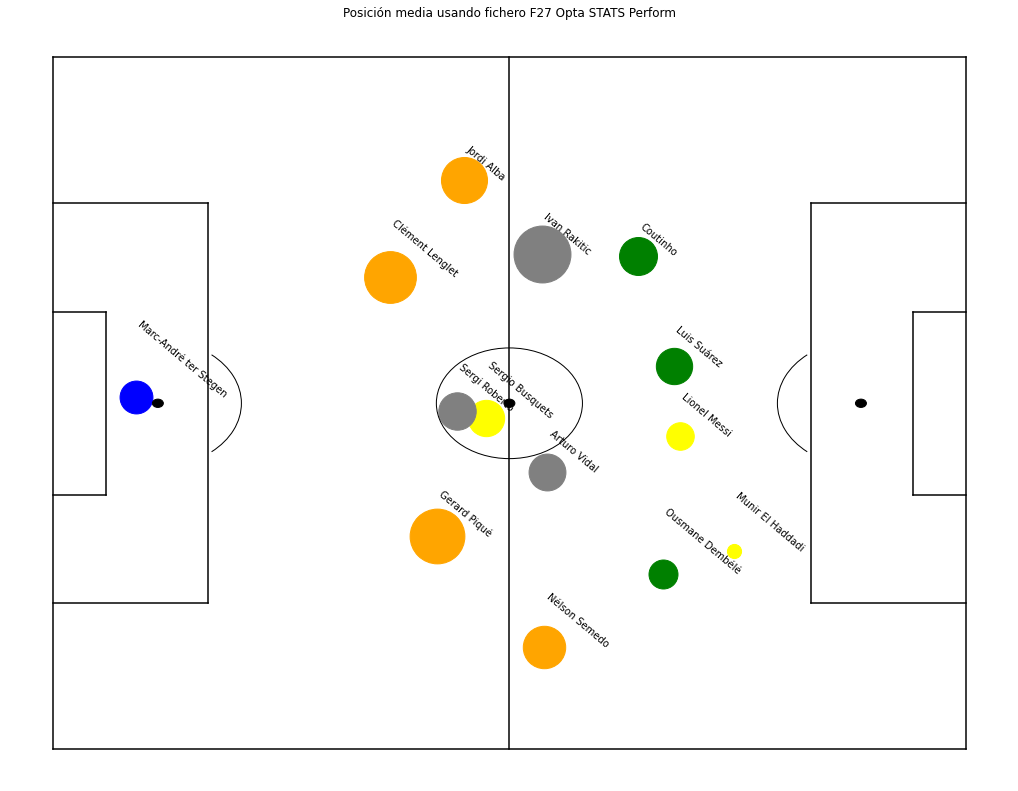

In [336]:
fig, ax = plt.subplots(figsize=(18,14))

# Posición Media Scatter Puntos con color en función de su demarcación
for i in range(len(P_Df)):
    ax.text(P_Df.iloc[i,1], P_Df.iloc[i,2], s = P_Df.iloc[i,0], rotation = -40, size = 10)
    if P_Df.iloc[i,3] == "Goalkeeper":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "blue")
    if P_Df.iloc[i,3] == "Forward":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "green")            
    if P_Df.iloc[i,3] == "Midfielder":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "grey")
    if P_Df.iloc[i,3] == "Defender":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "orange")
    if P_Df.iloc[i,3] == "Substitute":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "yellow")
  


# OPTA PITCH
# Pitch Outline & Centre Line 
plt.plot([0,0],[0,100], color="black")
plt.plot([0,100],[100,100], color="black") #upper line x_start x_end y_start y_end
plt.plot([100,100],[100,0], color="black")
plt.plot([100,0],[0,0], color="black")
plt.plot([50,50],[0,100], color="black")

# Left Penalty Area
plt.plot([17,17],[78.9,21.1],color="black")
plt.plot([0,17],[78.9,78.9],color="black")
plt.plot([17,0],[21.1,21.1],color="black")

# Right Penalty Area
plt.plot([100,83],[78.9,78.9],color="black")
plt.plot([83,83],[78.9,21.1],color="black")
plt.plot([83,100],[21.1,21.1],color="black")

# Left 6-yard Box
plt.plot([0,5.8],[63.2,63.2],color="black")
plt.plot([5.8,5.8],[63.2,36.8],color="black")
plt.plot([5.8,0],[36.8,36.8],color="black")

# Right 6-yard Box 
plt.plot([100,94.2],[63.2,63.2],color="black")
plt.plot([94.2,94.2],[63.2,36.8],color="black")
plt.plot([94.2,100],[36.8,36.8],color="black")

# Prepare Circles OK
#centreCircle = plt.Circle((50,50),9.15,color="black",fill=False)
centreCircle = plt.Circle((50,50),8,color="black",fill=False)
centreSpot = plt.Circle((50,50),0.6,color="black")
leftPenSpot = plt.Circle((11.5,50),0.6,color="black")
rightPenSpot = plt.Circle((88.5,50),0.6,color="black")

# Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

# Prepare Arcs based on penalty Spots 
leftArc = Arc((11.5,50),height=18.3,width=18.3,angle=0,
              theta1=310,theta2=50,color="black")
rightArc = Arc((88.5,50),height=18.3,width=18.3,angle=0,
               theta1=130,theta2=230,color="black")


# Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

# Quitar Ejes
plt.axis("off")
plt.title("Posición media usando fichero F27 Opta STATS Perform")

plt.show()